<a href="https://colab.research.google.com/github/ayydannm/MachineLearning/blob/main/Classification_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_openml

mnist=fetch_openml('mnist_784',as_frame=False)

In [ ]:
X,y=mnist.data,mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [ ]:
X.shape

(70000, 784)

In [ ]:
X[0].shape

(784,)

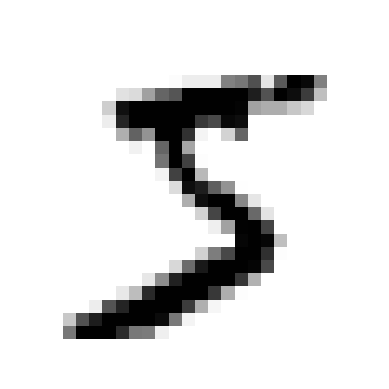

In [ ]:
import matplotlib.pyplot as plt

def plot_digit(X):
  X=X.reshape(28,28)
  plt.imshow(X,cmap='binary')
  plt.axis('off')

plot_digit(X[0])

In [ ]:
y[0]

'5'

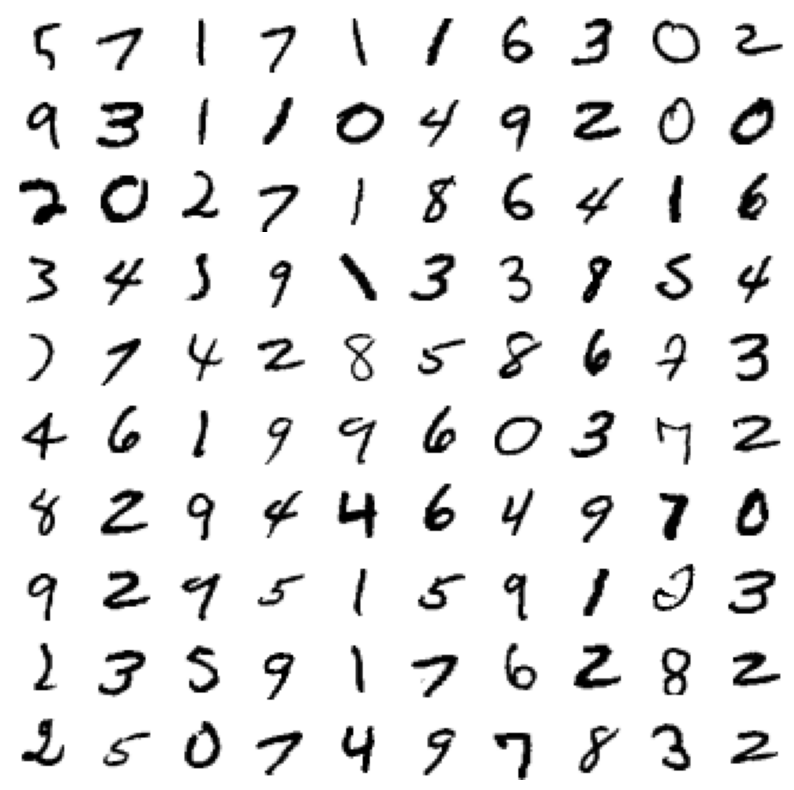

In [ ]:
plt.figure(figsize=(10,10))
for idx,image in enumerate(X[100:200]):
     plt.subplot(10,10,idx+1)
     plot_digit(image)

In [ ]:
print(y[100:110])

['5' '7' '1' '7' '1' '1' '6' '3' '0' '2']


In [ ]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [ ]:
y_train_5=(y_train=='5')
y_test_5=(y_test=='5')

In [ ]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [ ]:
y_train

array(['5', '0', '4', ..., '5', '6', '8'], dtype=object)

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)
sgd_clf.score(X_test,y_test_5)

0.9492

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
sgd_clf.predict([X[0]])

array([ True])

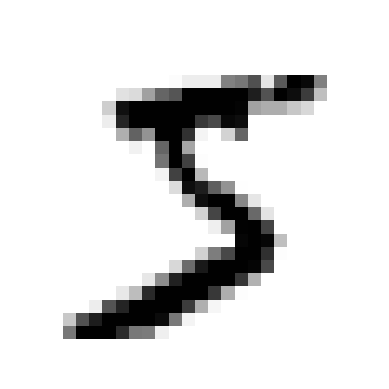

In [ ]:
plot_digit(X[0])

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf=DummyClassifier()
dummy_clf.fit(X_train,y_train_5)
cross_val_score(dummy_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.90965, 0.90965, 0.90965])

In [ ]:
import pandas as pd
pd.Series(y_train_5).value_counts() /len(y_train_5)

,count
False,0.90965
True,0.09035


In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [ ]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_train_5,y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

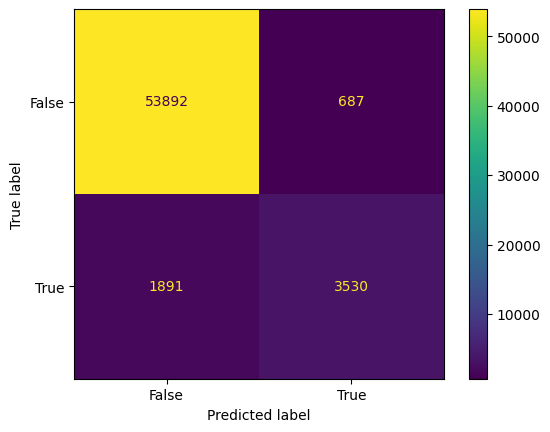

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train_5,y_train_pred)
plt.show()

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score

precision_score(y_train_5,y_train_pred) #modelin 5 dedeikleri ne qeder dogrudur

0.8370879772350012

In [ ]:
recall_score(y_train_5,y_train_pred) #esas (umumi) 5 lerin neqederini tutub

0.6511713705958311

In [ ]:
f1_score(y_train_5,y_train_pred) #precision vs recall harmonik orta

0.7325171197343847

In [ ]:
cm

array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
cm[1,1]

np.int64(3530)

In [ ]:
cm[1,1]/(cm[1,1]+cm[0,1])  #TP/TP+FP(precision)

np.float64(0.8370879772350012)

In [ ]:
3530/(3530+687)

0.8370879772350012

In [ ]:
cm[1,1]/(cm[1,1]+cm[1,0]) #TP/TP+FN  (recall)

np.float64(0.6511713705958311)

In [ ]:
3530/(3530+1891)

0.6511713705958311

In [ ]:
sgd_clf.decision_function(X_train[[0]])

array([2164.22030239])

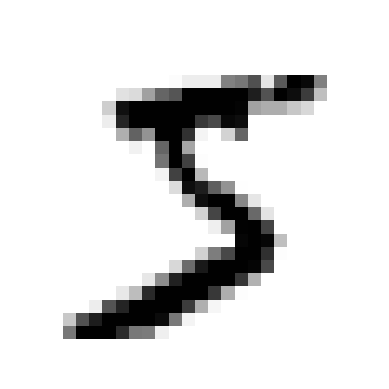

In [ ]:
plot_digit(X_train[0])

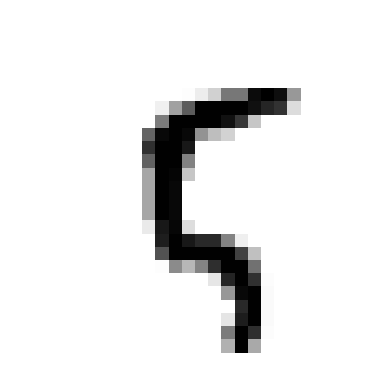

In [ ]:
plot_digit(X_train[100])

In [ ]:
sgd_clf.decision_function(X_train[[100]])

array([1854.68328897])

In [ ]:
y_scores=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,
                           method='decision_function')

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions,recalls,thresholds=precision_recall_curve(y_train_5,y_scores)

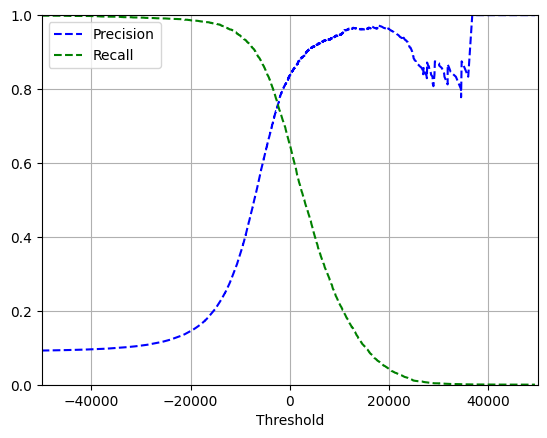

In [ ]:
plt.plot(thresholds,precisions[:-1],"b--",label='Precision')
plt.plot(thresholds,recalls[:-1],"g--",label='Recall')
plt.xlabel('Threshold')
plt.legend(loc="upper left")
plt.axis([-50000,50000,0,1])
plt.grid()
plt.show()

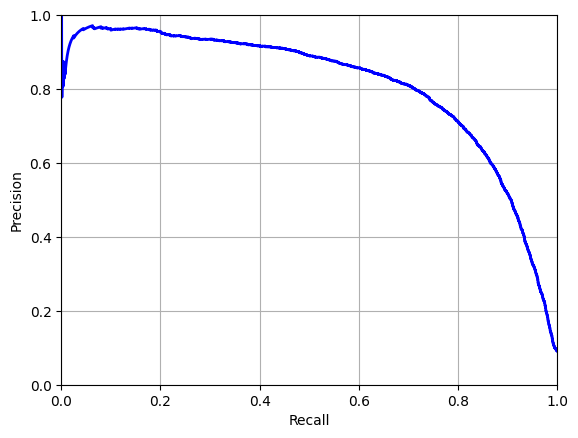

In [ ]:
plt.plot(recalls,precisions,"b-",linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0,1,0,1])
plt.grid();

In [ ]:
import numpy as np
index_for_90_precision=np.argmax(precisions>=0.9)
index_for_90_precision

np.int64(57109)

In [ ]:
thresholds_for_90_precision=thresholds[index_for_90_precision]
thresholds_for_90_precision

np.float64(3370.0194991439557)

In [ ]:
y_pred_90_precision=y_scores>thresholds_for_90_precision
y_pred_90_precision

array([False, False, False, ...,  True, False, False])

In [ ]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [ ]:
precision_score(y_train_5,y_pred_90_precision)

0.9

In [ ]:
recall_score(y_train_5,y_pred_90_precision)

0.47980077476480354

In [ ]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds_roc=roc_curve(y_train_5,y_scores) #X oxu → FPR (səhvən 5 demə) False Positive Rate (FP / (FP + TN))

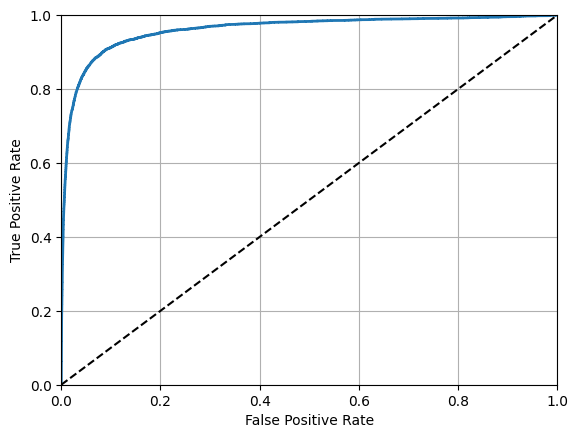

In [ ]:
plt.plot(fpr,tpr,linewidth=2)
plt.plot([0,1],[0,1],'k--')
plt.axis([0,1,0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

np.float64(0.9604938554008616)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf=RandomForestClassifier(random_state=42)
forest_clf.fit(X_train,y_train_5)

RandomForestClassifier(random_state=42)

In [ ]:
forest_clf.predict_proba(X_train[[0]])

array([[0.02, 0.98]])

In [ ]:
y_probas=cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method='predict_proba')
y_probas

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [ ]:
y_probas_positive=y_probas[:,1]
y_probas_positive

array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06])

In [ ]:
y_preds_forest=y_probas_positive>=0.5
y_preds_forest

array([ True, False, False, ...,  True, False, False])

In [ ]:
precision_score(y_train_5,y_preds_forest)

0.9897468089558485

In [ ]:
recall_score(y_train_5,y_preds_forest)

0.8725327430363402

In [ ]:
f1_score(y_train_5,y_preds_forest)

0.9274509803921569

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions_forest,recalls_forest,thresholds=precision_recall_curve(y_train_5,y_probas_positive)

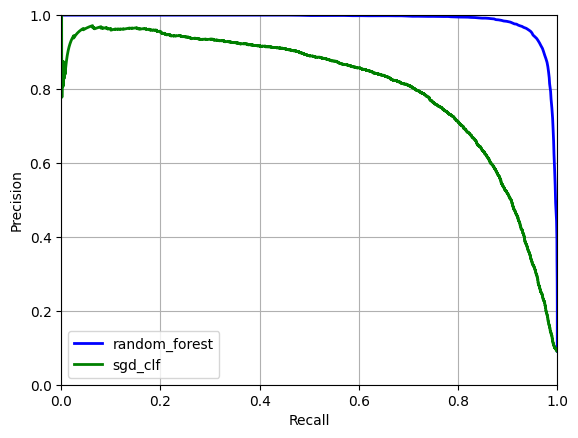

In [ ]:
plt.plot(recalls_forest,precisions_forest,"b-",linewidth=2,label='random_forest')
plt.plot(recalls,precisions,"g-",linewidth=2,label='sgd_clf')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0,1,0,1])
plt.legend()
plt.grid(); #eyni recallda hansi modelin  precisionu daha yuksekdise hemin model daha yaxsidir

#Multiclass Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf=RandomForestClassifier(random_state=42)
rnd_clf.fit(X_train,y_train)
cross_val_score(rnd_clf,X_train,y_train,cv=3)

array([0.9646 , 0.96255, 0.9666 ])

In [ ]:
pd.Series(y_train).value_counts()/len(y_train)

,count
1,0.112367
7,0.104417
3,0.102183
2,0.099300
9,0.099150
0,0.098717
6,0.098633
8,0.097517
4,0.097367
5,0.090350


In [ ]:
from sklearn.svm import SVC
svm_clf=SVC()
svm_clf.fit(X_train[:2000],y_train[:2000])
cross_val_score(svm_clf,X_train[:2000],y_train[:2000],cv=3)

array([0.91754123, 0.89955022, 0.93693694])

In [ ]:
#one versus Rest/one versus all 10class-10 model   ####one vs one
#one versus one  10 clas-45model    0,1  0,2  0,3  10*9/2

In [ ]:
sgd_clf=SGDClassifier(random_state=42)
cross_val_score(sgd_clf,X_train[:3000],y_train[:3000],cv=3)

array([0.822, 0.837, 0.856])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled=scaler.transform(X_test.astype(np.float64))

cross_val_score(sgd_clf,X_train_scaled[:3000],y_train[:3000],cv=3)

array([0.85 , 0.853, 0.88 ])

#Multilabel Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large=(y_train >= '7')
y_train_odd=(y_train.astype(int)%2==1)
y_multilabel=np.c_[y_train_large,y_train_odd]

knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier()

In [ ]:
knn_clf.predict(X_test[[0]])

array([[ True,  True]])

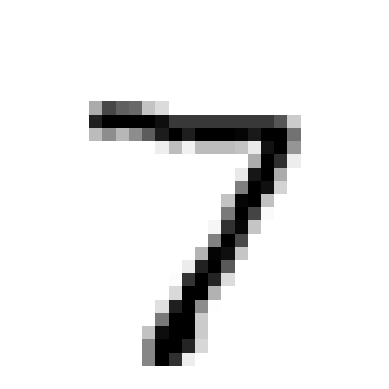

In [ ]:
plot_digit(X_test[0])

#MultiOutput Classification

In [ ]:
noise=np.random.randint(0,100,(len(X_train),784))
X_train_mod=X_train+noise
noise=np.random.randint(0,100,(len(X_test),784))
X_test_mod=X_test+noise
y_train_mod=X_train
y_test_mod=X_test

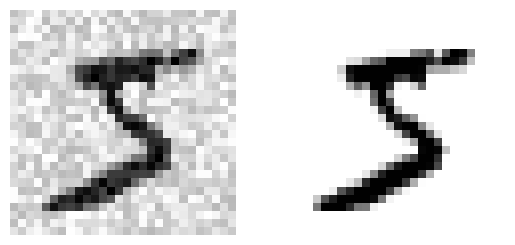

In [ ]:
plt.subplot(121)
plot_digit(X_train_mod[0])
plt.subplot(122)
plot_digit(y_train_mod[0])

In [ ]:
knn_clf.fit(X_train_mod,y_train_mod)

KNeighborsClassifier()

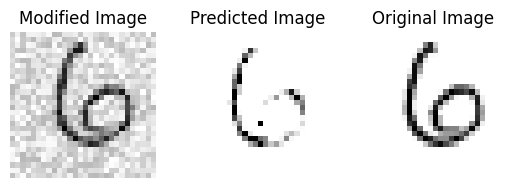

In [ ]:
idx=100
plt.subplot(131)
plt.title("Modified Image")
plot_digit(X_test_mod[idx]) #noise
plt.subplot(132)
plt.title("Predicted Image")
plot_digit(knn_clf.predict([X_test_mod[idx]])[0]) #modelin texmini
plt.subplot(133)
plt.title("Original Image")
plot_digit(y_test_mod[idx]) #temiz sekil
